# Formulation

1. Data
- Pada kasus ini yang ingin diprediksi adalah customer yang kemungkinan akan churn, serta berhenti menggunakan layanan dari aplikasi ecommerce.
- Customer yang kemungkinan akan churn dapat diprediksi berdasarkan data demografis user, perilaku user dalam bertransaksi, serta data lain yang mendukung.

2. ML Objective : objective dari ML ini adalah memaksimalkan revenue dari perusahaan, serta meminimalkan resiko churn untuk user lainnya di waktu yang akan datang.

3. Action : yang akan dilakukan setelah hasil prediksi diperoleh adalah menawarkan user yang teridentifikasi churn dengan program package promo yang sesuai untuk mereka.

4. Value : hasil yang ingin dicapai dari penggunaan model machine learning ini adalah meningkatnya revenue dari perusahaan dan meminimalisir kehilangan user dalam aplikasi ecomerse.

# Import Data

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
df = pd.read_csv("ECommerceDataset_clean.csv", index_col="CustomerID")
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
50002,1,10,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,121
50003,1,10,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
50005,1,0,Mobile Phone,1,12,Credit Card,Male,2,3,Mobile Phone,5,Single,3,0,11,1,1,3,130


In [3]:
# percentage of the missing values
for col in df.columns:
    prct = np.mean(df[col].isnull())
    print('{}: {}%'.format(col, round(prct*100)))

Churn: 0%
Tenure: 0%
PreferredLoginDevice: 0%
CityTier: 0%
WarehouseToHome: 0%
PreferredPaymentMode: 0%
Gender: 0%
HourSpendOnApp: 0%
NumberOfDeviceRegistered: 0%
PreferedOrderCat: 0%
SatisfactionScore: 0%
MaritalStatus: 0%
NumberOfAddress: 0%
Complain: 0%
OrderAmountHikeFromlastYear: 0%
CouponUsed: 0%
OrderCount: 0%
DaySinceLastOrder: 0%
CashbackAmount: 0%


In [4]:
df.Churn.value_counts() / len(df)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

Bisa dilihat disini variabel target cukup imbalance datanya

In [5]:
df.shape

(5630, 19)

Berdasarkan dataset, terdapat 5630 data observasi.

# Collinearity

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
X = df[["CityTier", "Complain", "Tenure", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]]

In [8]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [9]:
calc_vif(X)

,variables,VIF
0,CityTier,4.162109
1,Complain,1.396940
2,Tenure,3.383425
3,WarehouseToHome,4.585056
4,HourSpendOnApp,19.676574
5,NumberOfDeviceRegistered,16.143622
6,SatisfactionScore,5.477362
7,NumberOfAddress,4.213789
8,OrderAmountHikeFromlastYear,14.854923
9,CouponUsed,5.372234


- VIF = 1, tidak ada korelasi antara variabel independen dengan variabel lain
- VIF melebihi dari 10 menunjukkan multikolinearitas yang tinggi antara variabel independen dengan variabel lainnya
https://bbs.binus.ac.id/management/2019/12/analisis-uji-asumsi-klasik/

Berikut nilai VIF yang perlu dipertimbangkan dalam melakukan modeling, jika memungkinkan bisa didrop fitur dibawah ini:
- HourSpendOnApp 19.676574
- NumberOfDeviceRegistered 16.143622
- OrderAmountHikeFromlastYear 14.854923
- CashbackAmount 22.911403

## Principal component analysis (PCA)

In [10]:
df_PCA = X[['HourSpendOnApp', 'NumberOfDeviceRegistered', 'OrderAmountHikeFromlastYear', 'CashbackAmount']]

### Standard Scalling

In [11]:
# scale the DataFrame
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_PCA_scalled=scaler.fit_transform(df_PCA)

* Untuk mempermudah model melakukan proses learning maka dilakukan scalling pada feature yang akan dilakukan proses dimentional reduction

### Dimention Reduction untuk df_PCA

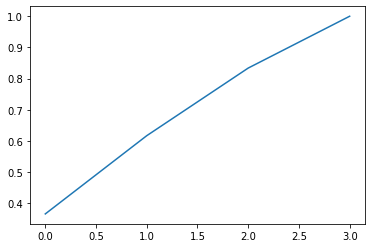

In [15]:
from sklearn.decomposition import PCA
pca=PCA(whiten=True)
pca.fit(df_PCA_scalled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

In [16]:
np.sum(pca.explained_variance_ratio_)

1.0

In [17]:
cumsum

array([0.36658736, 0.6172637 , 0.83394379, 1.        ])

* berdasarkan grafik diatas maka diambil patahan dengan 2 komponen dengan tingkat informasi data yang di keep sebesar 83,39%
* diambilnya n_components 2 mempertimbangkan kompleksitas dari grafik sehingga tidak mempersulit saat melakukan identifikasi yang diperlukan

### Transform df_PCA ke df_PCA_Final

,num1,num2
0,0.740092,-0.986810
1,0.257547,0.380321
2,1.198949,0.099581
3,0.529086,2.206150
4,1.904040,-0.721720


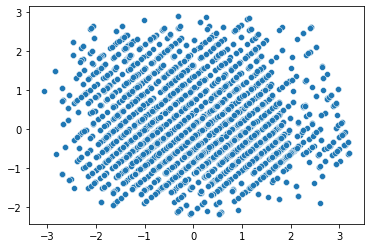

In [18]:
X2D=PCA(n_components=2).fit_transform(df_PCA_scalled)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1])
df_PCA_final=pd.DataFrame(data=X2D,columns=["num1","num2"])
df_PCA_final.head()

didapat 2 feature baru dengan sebaran data sebagai berikut, untuk menggantikan feature numerik sebagai bentuk dimentional reduction dari PCA

In [19]:
df_PCA_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num1    5630 non-null   float64
 1   num2    5630 non-null   float64
dtypes: float64(2)
memory usage: 88.1 KB


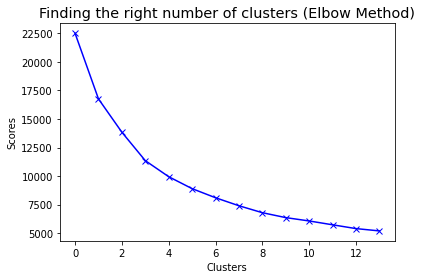

In [22]:
scores_1 = []

range_values = range(1,15)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_PCA_scalled)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters (Elbow Method)')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

## Penggabungan Feature & feature PCA

In [23]:
X

,CityTier,Complain,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,
50001,3,1,4,6,3,3,2,9,11,1,1,5,160
50002,1,1,10,8,3,4,3,7,15,0,1,0,121
50003,1,1,10,30,2,4,3,6,14,0,1,3,120
50004,3,0,0,15,2,4,5,8,23,0,1,3,134
50005,1,0,0,12,2,3,5,3,11,1,1,3,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55626,1,0,10,30,3,2,1,6,18,1,2,4,151
55627,1,0,13,13,3,5,5,6,16,1,2,4,225
55628,1,1,1,11,3,2,4,3,21,1,2,4,186


In [24]:
df_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   HourSpendOnApp               5630 non-null   int64
 1   NumberOfDeviceRegistered     5630 non-null   int64
 2   OrderAmountHikeFromlastYear  5630 non-null   int64
 3   CashbackAmount               5630 non-null   int64
dtypes: int64(4)
memory usage: 219.9 KB


In [25]:
dfx = X.drop(['HourSpendOnApp', 'NumberOfDeviceRegistered', 'OrderAmountHikeFromlastYear', 'CashbackAmount'], axis=1)

In [26]:
dfx.reset_index(drop=True, inplace=True)

In [27]:
df_PCA_final.reset_index(drop=True, inplace=True)

Reset index untuk menghindari timbulnya Nan value dikarenakan penggabungan dengan pdconcat

In [28]:
dfxs = pd.concat([dfx, df_PCA_final], axis=1)

In [29]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [30]:
calc_vif(X)

,variables,VIF
0,CityTier,4.162109
1,Complain,1.396940
2,Tenure,3.383425
3,WarehouseToHome,4.585056
4,HourSpendOnApp,19.676574
5,NumberOfDeviceRegistered,16.143622
6,SatisfactionScore,5.477362
7,NumberOfAddress,4.213789
8,OrderAmountHikeFromlastYear,14.854923
9,CouponUsed,5.372234


## VIF Final

In [32]:
vif_data = pd.DataFrame()
vif_data["variables"] = dfxs.columns
vif_data["VIF"] = [variance_inflation_factor(dfxs.values, i) for i in range(len(dfxs.columns))]
vif_data

,variables,VIF
0,CityTier,3.554334
1,Complain,1.366360
2,Tenure,2.775731
3,WarehouseToHome,3.930402
4,SatisfactionScore,4.683754
5,NumberOfAddress,3.693858
6,CouponUsed,5.252388
7,OrderCount,6.016900
8,DaySinceLastOrder,3.545731
9,num1,1.140218


Terlihat perbedaan nilai setelah dilakukan Reduction Dimensional

# Pendefinisian Model

In [89]:
model = KMeans(n_clusters=2, random_state=42)

In [91]:
dfxs = scaler.fit_transform(dfxs)

In [92]:
model.fit(dfxs)

KMeans(n_clusters=2, random_state=42)

Text(0, 0.5, 'Inertia')

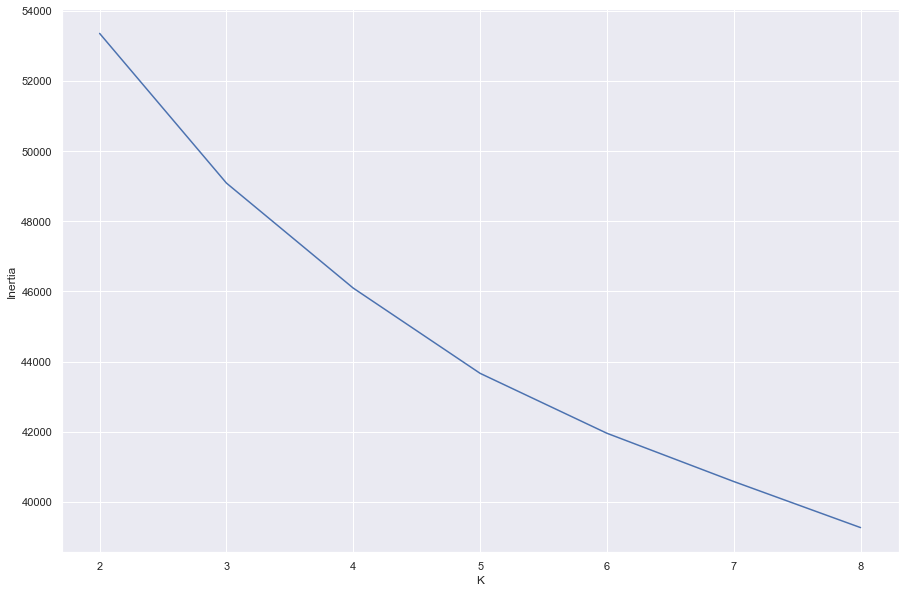

In [94]:
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(dfxs).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Score')

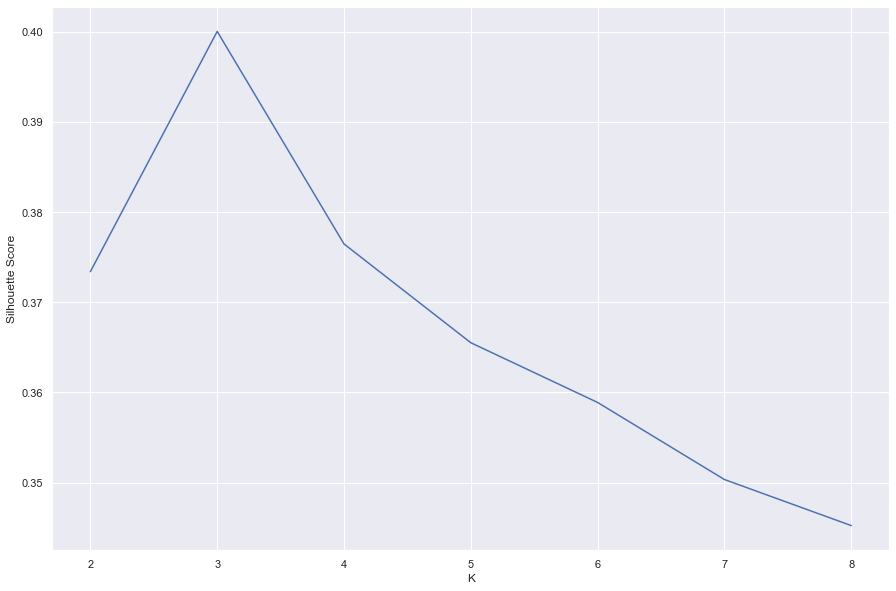

In [98]:
silhoutte =[silhouette_score(X2D, KMeans(n_clusters=i).fit(X2D).labels_) for i in K]
plt.plot(K,silhoutte)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

In [99]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3733976114195684
For n_clusters = 3 The average silhouette_score is : 0.40004377906040595
For n_clusters = 4 The average silhouette_score is : 0.37646742298145563
For n_clusters = 5 The average silhouette_score is : 0.3654766257368035
For n_clusters = 6 The average silhouette_score is : 0.35813145210500974
For n_clusters = 7 The average silhouette_score is : 0.34995423102024314
For n_clusters = 8 The average silhouette_score is : 0.345139226061708


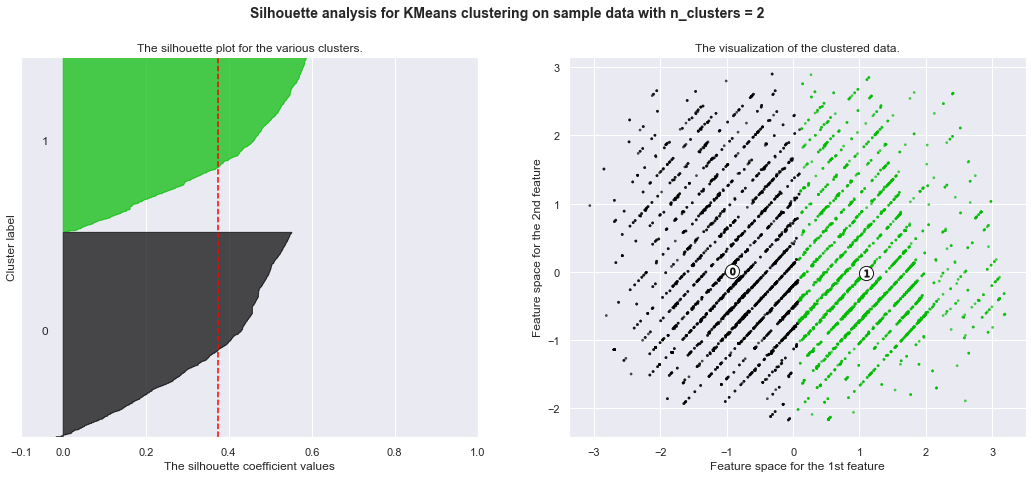

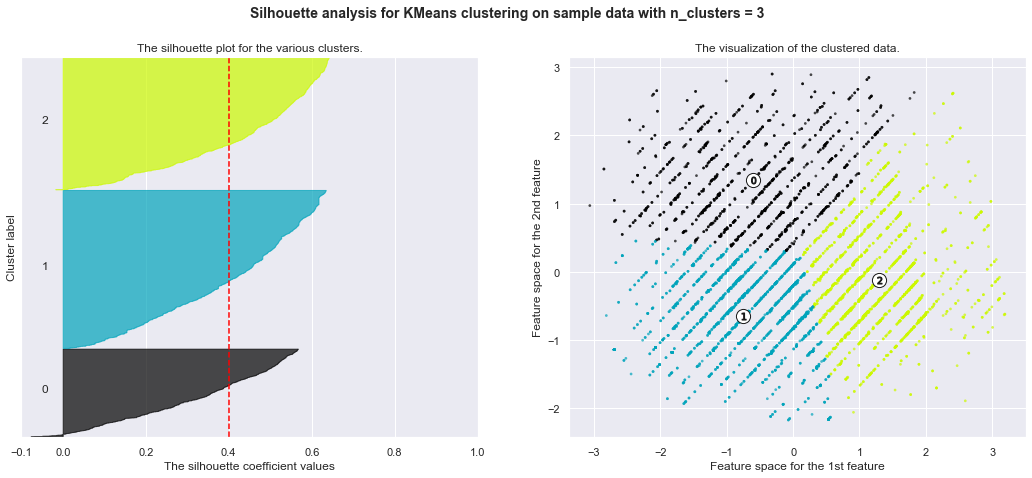

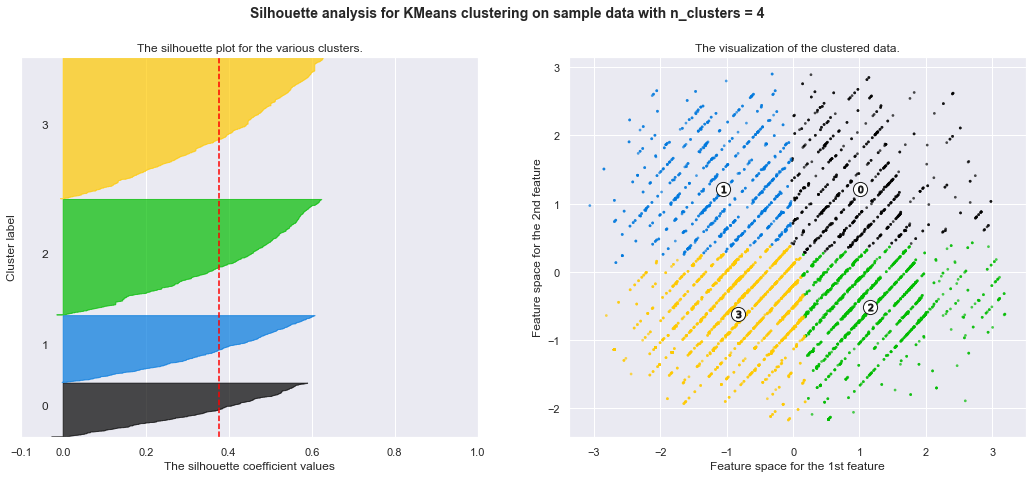

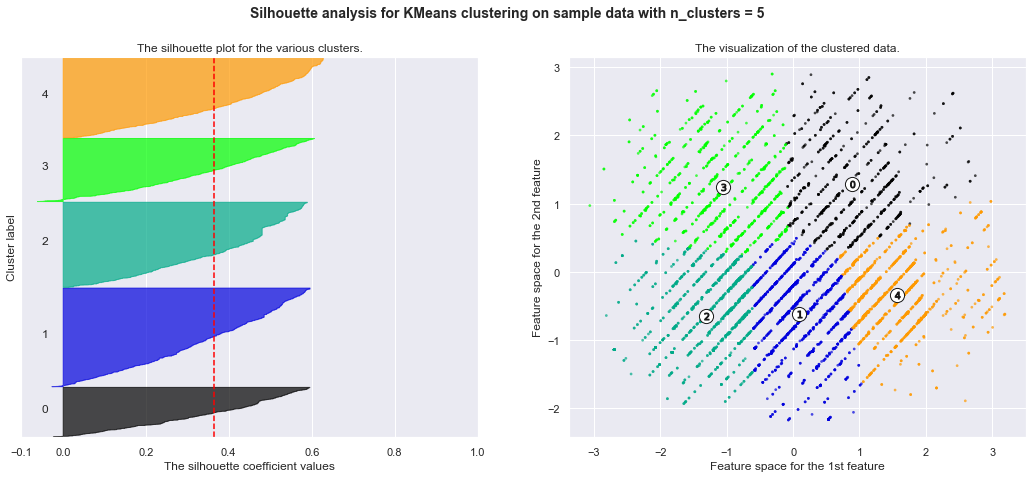

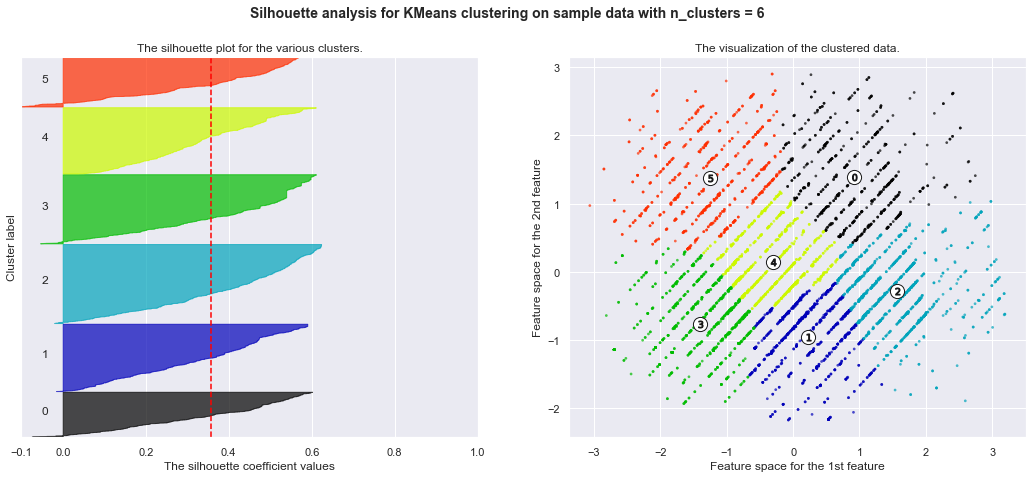

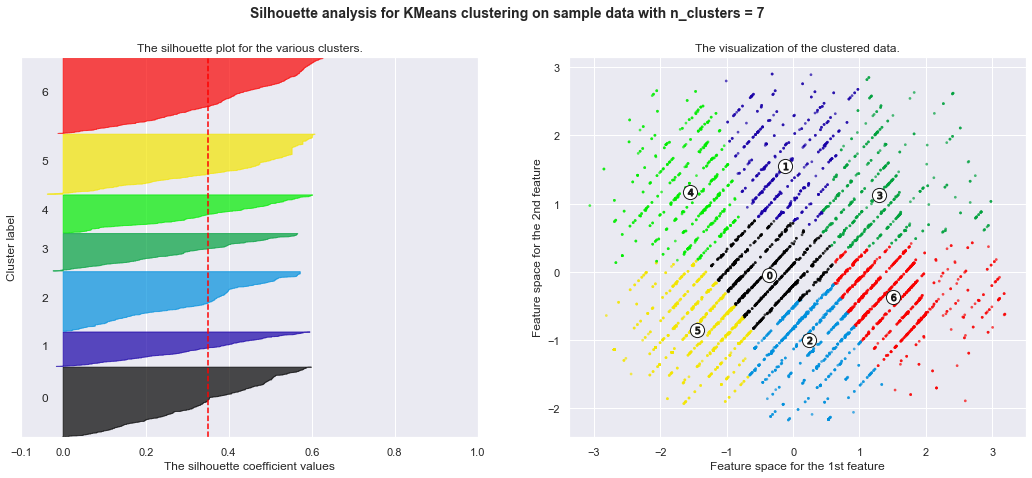

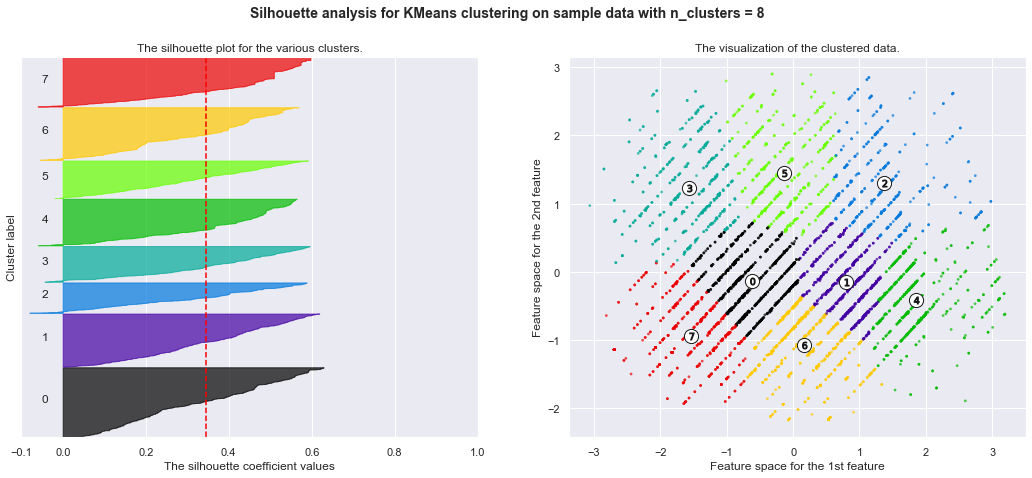

In [102]:
plot_silhouette(K,X2D)

In [ ]:
Yang terpilih adalah n_components 3 dengan skor silhouete 0,4

## Aglomerative Clustering

In [103]:
agglo =AgglomerativeClustering(linkage="ward", n_clusters=3).fit(X2D) 

> Model Linkage ward dipilih untuk proses Agglomerative clustering dikarenakan criterrion ini memiliki algoritma yang "mempunish" proses merge, sehingga kluster seharusnya lebih berjarak dikarenakan ward meminimalisir variance antar titik

Text(0.5, 1.0, 'WARD')

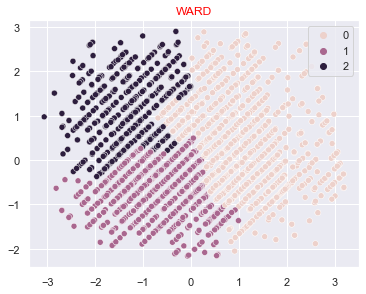

In [105]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1],hue=agglo.labels_)
plt.title("WARD", color='red')

> Hasil dari aglomerative clustering dinilai cukup baik dengan jarak antar kelompok sudah terbentuk dengan jelas 

# Model Inference

In [106]:
# n_clusters dari hasil silhouette score
kmeans_new = KMeans(n_clusters = 3, random_state=42)
kmeans_new.fit(X2D)

KMeans(n_clusters=3, random_state=42)

In [116]:
labels = kmeans_new.labels_
# concatenate the new reduced clusters labels to our original dataframe
df_new = pd.concat([dfx, pd.DataFrame({'Churn':labels})], axis = 1)
df_new.head().T

,0,1,2,3,4
CityTier,3,1,1,3,1
Complain,1,1,1,0,0
Tenure,4,10,10,0,0
WarehouseToHome,6,8,30,15,12
SatisfactionScore,2,3,3,5,5
NumberOfAddress,9,7,6,8,3
CouponUsed,1,0,0,0,1
OrderCount,1,1,1,1,1
DaySinceLastOrder,5,0,3,3,3
Churn,1,1,1,0,1


In [123]:
# Persentase sebaran label kluster
df_new.Churn.value_counts()/df_new.shape[0]*100

2    41.829485
1    34.920071
0    23.250444
Name: Churn, dtype: float64

Disamping kesimpulan yang sudah di sampaikan pada tiap grafik / section maka :

1. > Hasil model clustering K-Mean diatas telah berhasil memisahkan cluster cukup dengan n_components berada pada skor 3 untuk mencapai skor sihouete tertinggi. 

2. > Skor Silhouette yang tinggi memberikan makna bahwa masing masing cluster telah terpisah dengan baik

3. >Klaster yang terbentuk dari Model K-Means yang telah dibuat dapat dikategorikan menjadi 3, dengan karakter:
- Klaster 1 - 41.8% dari total sampel
- Klaster 0 - 34.9% dari total sampel
- Klaster 2 - 23.2% dari total sampel

>1. Klaster 1 Menunjukan Jumlah dari orang-orang yang Churn karena alasan-alasan dari yang sudah di paparkan pada EDA
>2. Klaster 0 Menunjukan Jumlah dari orang-orang yang setia menggunakan applikasi
>3. Klaster 2 Menunjukan Jumlah dari orang-orang yang berpotensi akan Churn

4. > Aglomerative Clustering pun dapat memvisualisasikan data dengan baik. sehingga menurut saya baik algoritma K-Means / Aglomerative Clustering keduanya cocok digunakan pada dataset ini.





# Save Model

In [74]:
# import pickle, os

In [126]:
# pickle.dump(modelLogReg, 'Logreg_13Januari22.pkl')
# pickle.dump(modelLogReg.best_estimator_, 'Logregbest_13Januari22.pkl')
joblib.dump(kmeans_new, 'bestKmeans22.pkl')

['bestlogregJanuari22.pkl']

Now we have our trained model in form of .pkl file. We could call this file later when we want to try predict some data.